In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
)

In [ ]:
print("=" * 50)
print("SECTION 2: DATA LOADING & EXPLORATION")
print("=" * 50)

SECTION 2: DATA LOADING & EXPLORATION


In [3]:
loan_dataset = pd.read_csv("data/loan_default.csv")
loan_dataset.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
loan_dataset.shape

(255347, 18)

In [5]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
print("Duplicated Rows")
loan_dataset.duplicated().sum()

Duplicated Rows


np.int64(0)

In [7]:
print("Statistical Summary")
loan_dataset.describe()

Statistical Summary


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
print("Target value distribution")
loan_dataset["Default"].value_counts()

Target value distribution


Default
0    225694
1     29653
Name: count, dtype: int64

In [ ]:
print("=" * 50)
print("SECTION 3: EXPLORATORY DATA ANALYSIS")
print("=" * 50)

SECTION 3: EXPLORATORY DATA ANALYSIS


In [10]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12

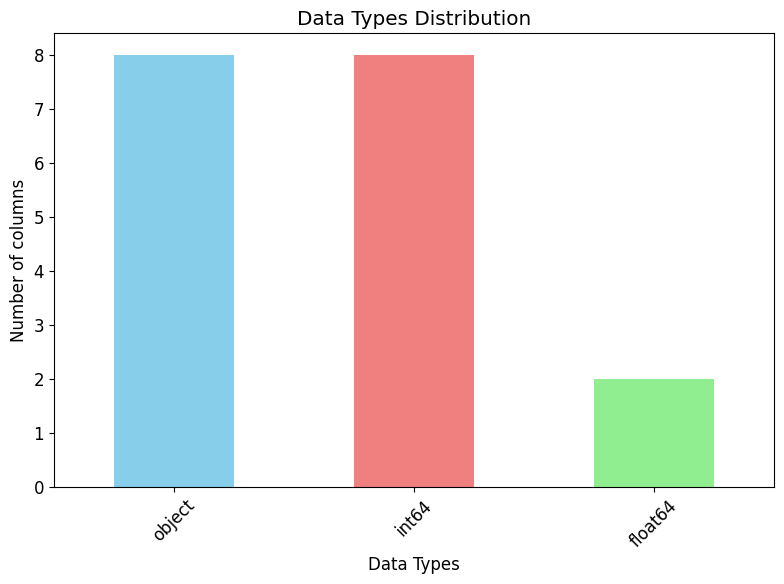

In [97]:
dtype_counts = loan_dataset.dtypes.value_counts()

plt.figure(figsize=(8, 6))
dtype_counts.plot(kind="bar", color=["skyblue", "lightcoral", "lightgreen"])
plt.title("Data Types Distribution")
plt.xlabel("Data Types")
plt.ylabel("Number of columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

Target Variable Distribution


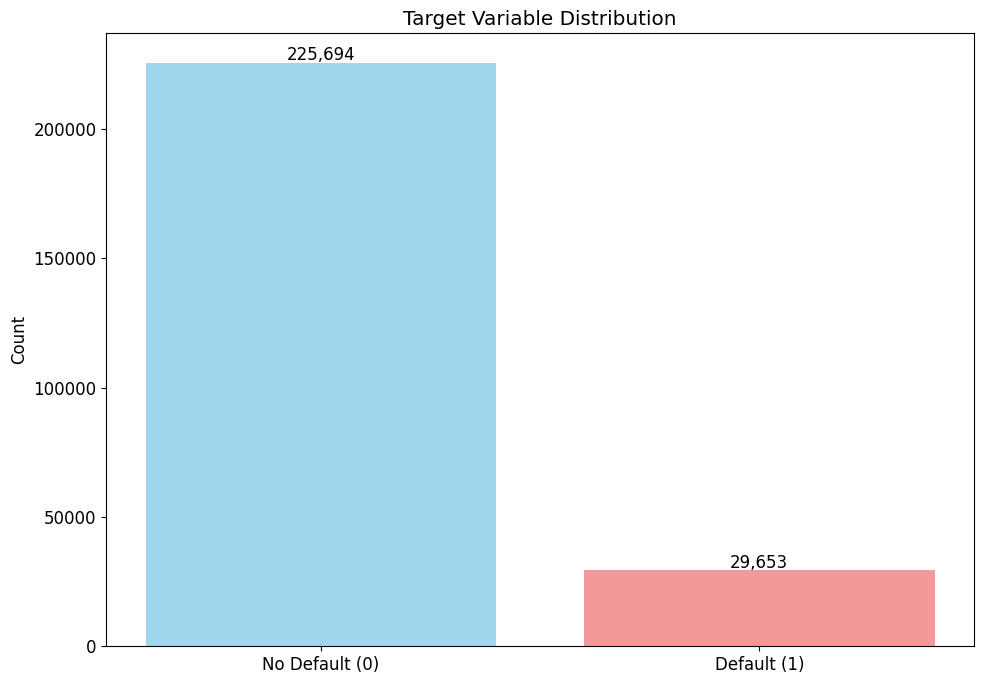

In [98]:
print("Target Variable Distribution")

plt.figure(figsize=(10, 7))
target_counts = loan_dataset["Default"].value_counts()
plt.bar(
    ["No Default (0)", "Default (1)"],
    target_counts.values,
    color=["skyblue", "lightcoral"],
    alpha=0.8,
)
plt.ylabel("Count")
plt.title("Target Variable Distribution")
plt.text(0, target_counts[0] + 800, f"{target_counts[0]:,}", ha="center")
plt.text(1, target_counts[1] + 800, f"{target_counts[1]:,}", ha="center")
plt.tight_layout()
plt.show()

Credit Score Distribution by Default


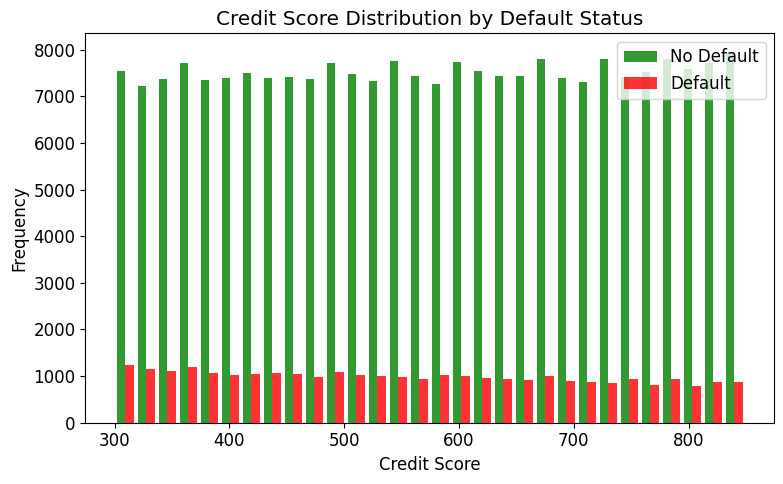

In [99]:
print("Credit Score Distribution by Default")
plt.figure(figsize=(8, 5))
plt.hist(
    [
        loan_dataset[loan_dataset["Default"] == 0]["CreditScore"],
        loan_dataset[loan_dataset["Default"] == 1]["CreditScore"],
    ],
    bins=30,
    label=["No Default", "Default"],
    color=["green", "red"],
    alpha=0.8,
)
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.title("Credit Score Distribution by Default Status")
plt.legend()
plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("Income vs Loan Amount")
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=loan_dataset,
    x="Income",
    y="LoanAmount",
    c=loan_dataset["Default"],
    cmap="RdYlGn_r",
    s=20,
)
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Income vs Loan Amount Colored by Default Status")
plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

Income vs Loan Amount


Correlation Heatmap (Numerical Features)


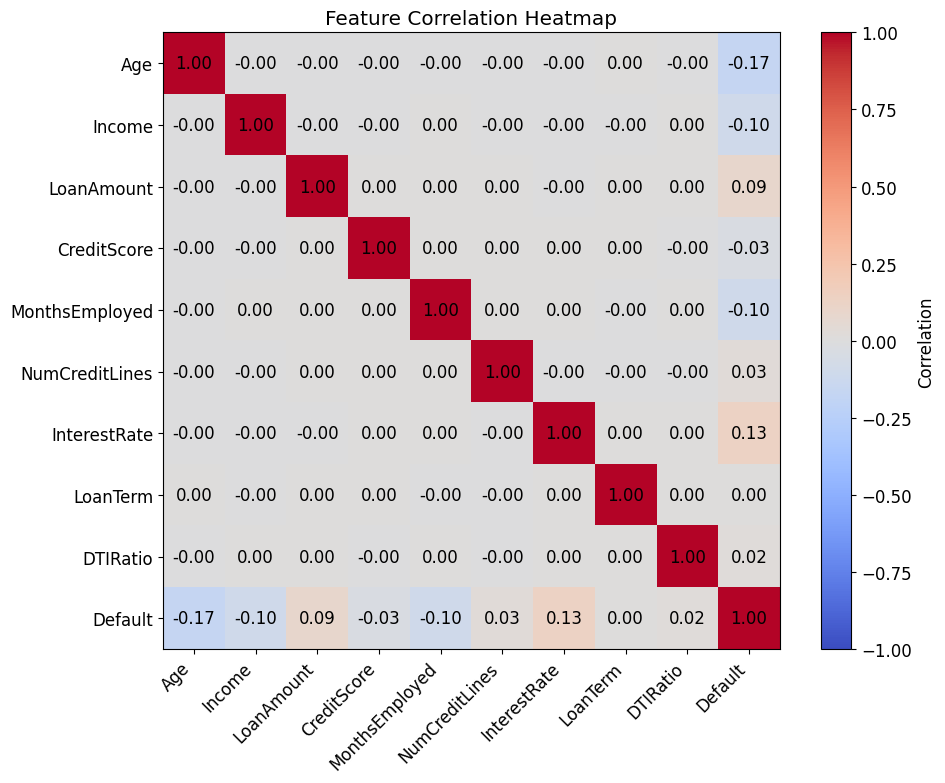

In [15]:
print("Correlation Heatmap (Numerical Features)")
numerical_features = loan_dataset.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
cbar = plt.colorbar()
cbar.set_label("Correlation")
plt.xticks(
    np.arange(len(numerical_features.columns)),
    numerical_features.columns,
    rotation=45,
    ha="right",
)
plt.yticks(np.arange(len(numerical_features.columns)), numerical_features.columns)
for i in range(len(numerical_features.columns)):
    for j in range(len(numerical_features.columns)):
        plt.text(
            j,
            i,
            f"{correlation_matrix.iloc[i,j]:.2f}",
            ha="center",
            va="center",
            color="black",
        )
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("eda_visualizations.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
print("=" * 50)
print("SECTION 4: DATA CLEANING AND PREPROCESSING")
print("=" * 50)

SECTION 4: DATA CLEANING AND PREPROCESSING


In [17]:
# Remove duplicates
duplicates_before = loan_dataset.duplicated().sum()
loan_dataset = loan_dataset.drop_duplicates()
print(f"Removed {duplicates_before} duplicate rows")

Removed 0 duplicate rows


In [ ]:
# Remove outliers (using IQR method for key features)
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print(f"\nDataset shape before outlier removal: {loan_dataset.shape}")
loan_dataset = remove_outliers(loan_dataset, "Income")
loan_dataset = remove_outliers(loan_dataset, "LoanAmount")
print(f"Dataset shape after outlier removal: {loan_dataset.shape}")


Dataset shape before outlier removal: (255347, 18)
Dataset shape after outlier removal: (255347, 18)


In [ ]:
print("=" * 50)
print("SECTION 4: FEATURE ENGINEERING")
print("=" * 50)

SECTION 4: FEATURE ENGINEERING


In [ ]:
X = loan_dataset.drop(["Default", "LoanID"], axis=1)
y = loan_dataset["Default"]
print(f"Feature Shape: {X.shape}")
print(f"Target Shape: {y.shape}")

Feature Shape: (255347, 16)
Target Shape: (255347,)


In [ ]:
categorical_cols = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"]
binary_cols = ["HasMortgage", "HasDependents", "HasCoSigner"]
numerical_cols = [
    "Age",
    "Income",
    "LoanAmount",
    "CreditScore",
    "MonthsEmployed",
    "NumCreditLines",
    "InterestRate",
    "LoanTerm",
    "DTIRatio",
]

In [22]:
print(f"\nCategorical features: {len(categorical_cols)}")
print(categorical_cols)
print(f"\nBinary features: {len(binary_cols)}")
print(binary_cols)
print(f"\nNumerical features: {len(numerical_cols)}")
print(numerical_cols)


Categorical features: 4
['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

Binary features: 3
['HasMortgage', 'HasDependents', 'HasCoSigner']

Numerical features: 9
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']


In [ ]:
print("Encoding categorical variables...")
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

Encoding categorical variables...


In [ ]:
for col in binary_cols:
    if X_encoded[col].dtype == "object":
        X_encoded[col] = X_encoded[col].map({"Yes": 1, "No": 0})

In [25]:
print(f"Features after encoding: {X_encoded.shape}")
print(f"New feature count: {X_encoded.shape[1]}")

Features after encoding: (255347, 24)
New feature count: 24


In [26]:
print("Scaling numerical features")
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])
print("Numerical features scaled using StandardScaler")

Scaling numerical features
Numerical features scaled using StandardScaler


In [27]:
X_encoded.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,1,...,False,False,False,False,False,False,False,False,False,True
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,0,...,False,False,False,False,True,False,False,False,False,True
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,1,...,False,False,False,True,False,False,False,False,False,False
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,0,...,False,False,False,False,True,False,True,False,False,False
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
print("=" * 50)
print("SECTION 4: TRAIN-TEST SPLIT")
print("=" * 50)

SECTION 4: TRAIN-TEST SPLIT


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
print(
    f"\nTraining set size: {X_train.shape[0]:,} samples ({(X_train.shape[0] / len(X_encoded))*100:.1f}%)"
)
print(
    f"Testing set size: {X_test.shape[0]:,} samples ({(X_test.shape[0] / len(X_encoded))*100:.1f}%)"
)
print(f"\nTraining set - Default distribution:")
print(y_train.value_counts())
print(f"\nTesting set - Default distribution:")
print(y_test.value_counts())


Training set size: 204,277 samples (80.0%)
Testing set size: 51,070 samples (20.0%)

Training set - Default distribution:
Default
0    180555
1     23722
Name: count, dtype: int64

Testing set - Default distribution:
Default
0    45139
1     5931
Name: count, dtype: int64


In [ ]:
print("\n" + "=" * 50)
print("SECTION 7: MODEL BUILDING & TRAINING")
print("=" * 50)


SECTION 7: MODEL BUILDING & TRAINING


In [81]:
from sklearn.ensemble import GradientBoostingClassifier
classifiers = {
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight="balanced",
        n_jobs=1,
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=1000, 
        random_state=42, 
        class_weight="balanced", 
        n_jobs=1
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5, 
        random_state=42, 
        class_weight="balanced"
    )
}

In [82]:
results = {}
print(f"Training 3 different classifiers...\n")

for name, clf in classifiers.items():
    print(f"{'='*30}")
    print(f"Training: {name}")
    print(f"{'='*30}")

    clf.fit(X_train, y_train)
    print(f"Training Completed!")
    # Make predictions
    y_pred = clf.predict(X_test)
    # Get probability predictions for ROC curve (if available)
    if hasattr(clf, "predict_proba"):
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_pred_proba = clf.decision_function(X_test)
    else:
        y_pred_proba = y_pred
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Calculate ROC AUC score
    try:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except:
        roc_auc = accuracy
    results[name] = {
        "model": clf,
        "predictions": y_pred,
        "probabilities": y_pred_proba,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
    }
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

print("All models trained successfully!\n")

Training 3 different classifiers...

Training: Random Forest
Training Completed!
Accuracy: 0.7276
Precision: 0.2423
Recall: 0.6324
F1-Score: 0.3504
Training: Logistic Regression
Training Completed!
Accuracy: 0.6763
Precision: 0.2196
Recall: 0.6995
F1-Score: 0.3342
Training: Decision Tree
Training Completed!
Accuracy: 0.6647
Precision: 0.2057
Recall: 0.6592
F1-Score: 0.3135
All models trained successfully!



In [83]:
print("\n" + "=" * 50)
print("SECTION 8: MODEL EVALUATION & COMPARISON")
print("=" * 50)


SECTION 8: MODEL EVALUATION & COMPARISON


In [84]:
comparison_df = pd.DataFrame(
    {
        "Model": list(results.keys()),
        "Accuracy": [results[m]["accuracy"] for m in results.keys()],
        "Precision": [results[m]["precision"] for m in results.keys()],
        "Recall": [results[m]["recall"] for m in results.keys()],
        "F1-Score": [results[m]["f1_score"] for m in results.keys()],
        "ROC AUC": [results[m]["roc_auc"] for m in results.keys()],
    }
)

In [85]:
print("MODEL PERFORMANCE COMPARISON:")
print("=" * 50)
print(comparison_df.to_string(index=False))
print("=" * 50)

MODEL PERFORMANCE COMPARISON:
              Model  Accuracy  Precision   Recall  F1-Score  ROC AUC
      Random Forest  0.727648   0.242313 0.632440  0.350381 0.752961
Logistic Regression  0.676327   0.219559 0.699545  0.334219 0.753180
      Decision Tree  0.664715   0.205660 0.659248  0.313515 0.718551


In [86]:
best_model_name = comparison_df.loc[comparison_df["Accuracy"].idxmax(), "Model"]
best_accuracy = comparison_df["Accuracy"].max()
print(f"\nBEST MODEL: {best_model_name}")
print(f"BEST ACCURACY: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")


BEST MODEL: Random Forest
BEST ACCURACY: 0.7276 (72.76%)


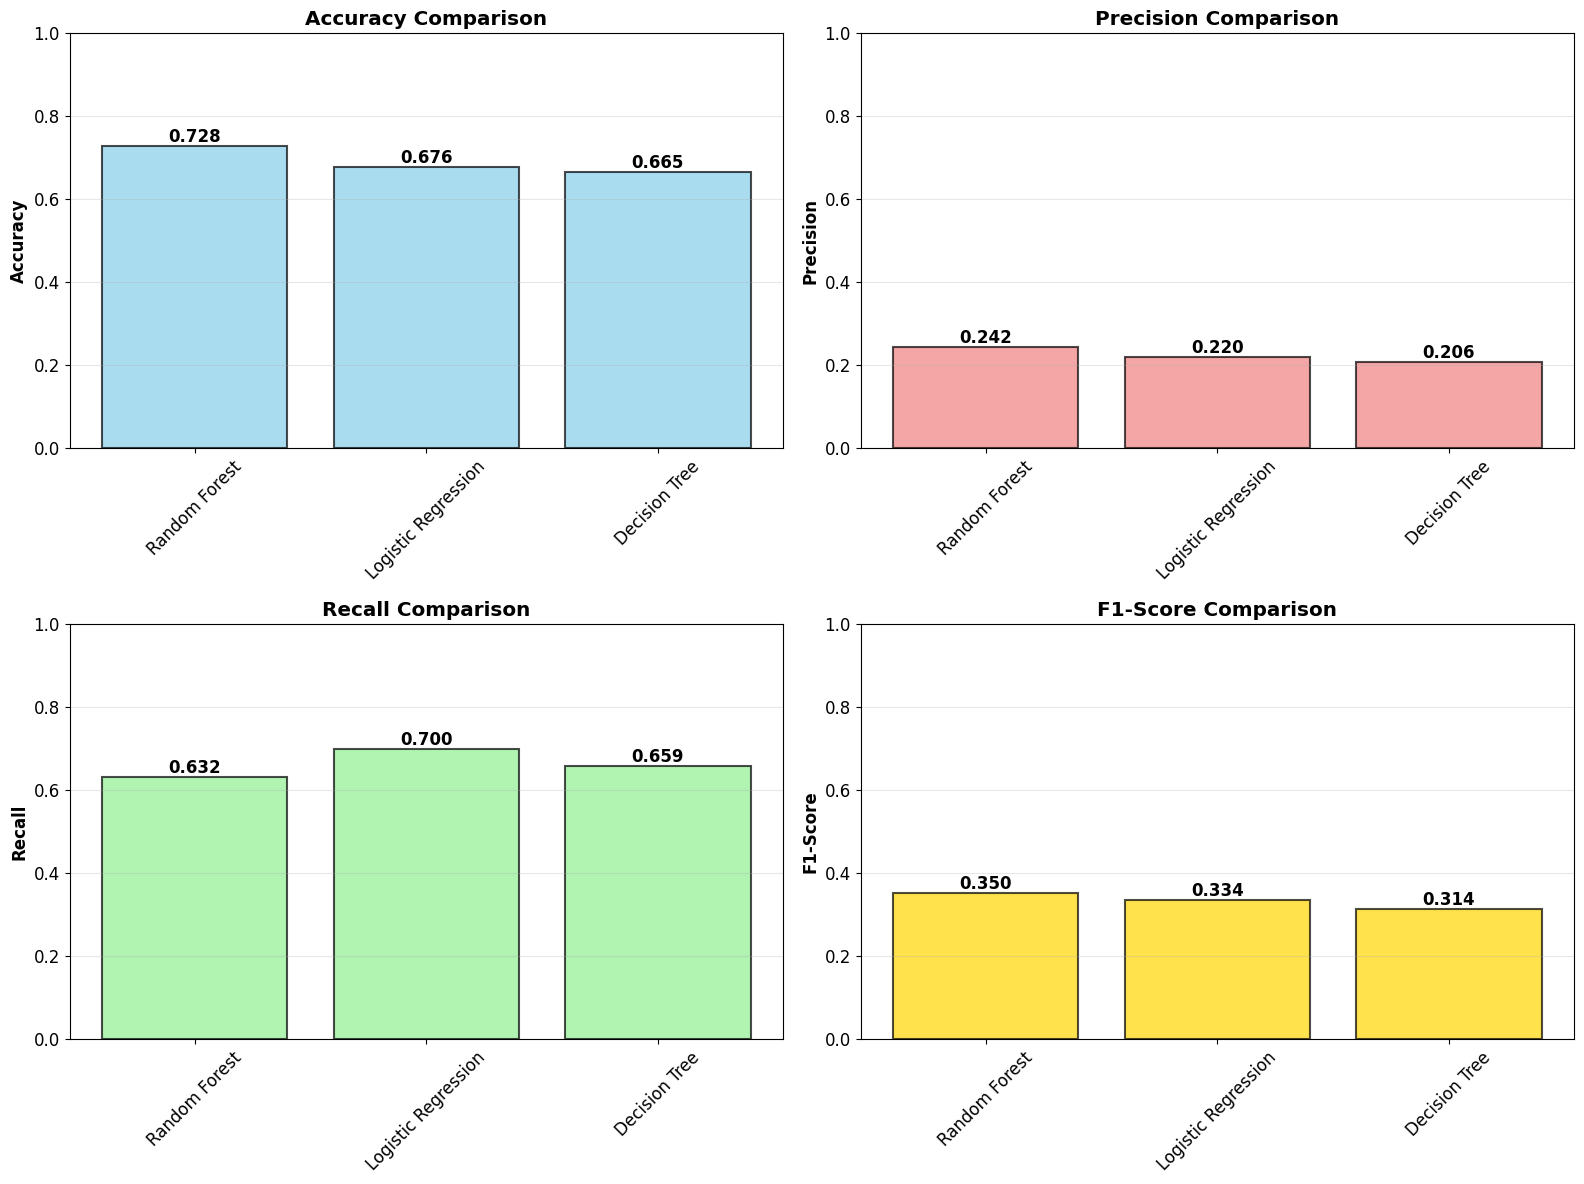

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "lightcoral", "lightgreen", "gold"]

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(
        comparison_df["Model"],
        comparison_df[metric],
        color=color,
        alpha=0.7,
        edgecolor="black",
        linewidth=1.5,
    )
    ax.set_ylabel(metric, fontsize=12, fontweight="bold")
    ax.set_title(f"{metric} Comparison", fontweight="bold")
    ax.set_ylim([0, 1])
    ax.tick_params(axis="x", rotation=45)
    ax.grid(axis="y", alpha=0.3)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontweight="bold",
        )

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

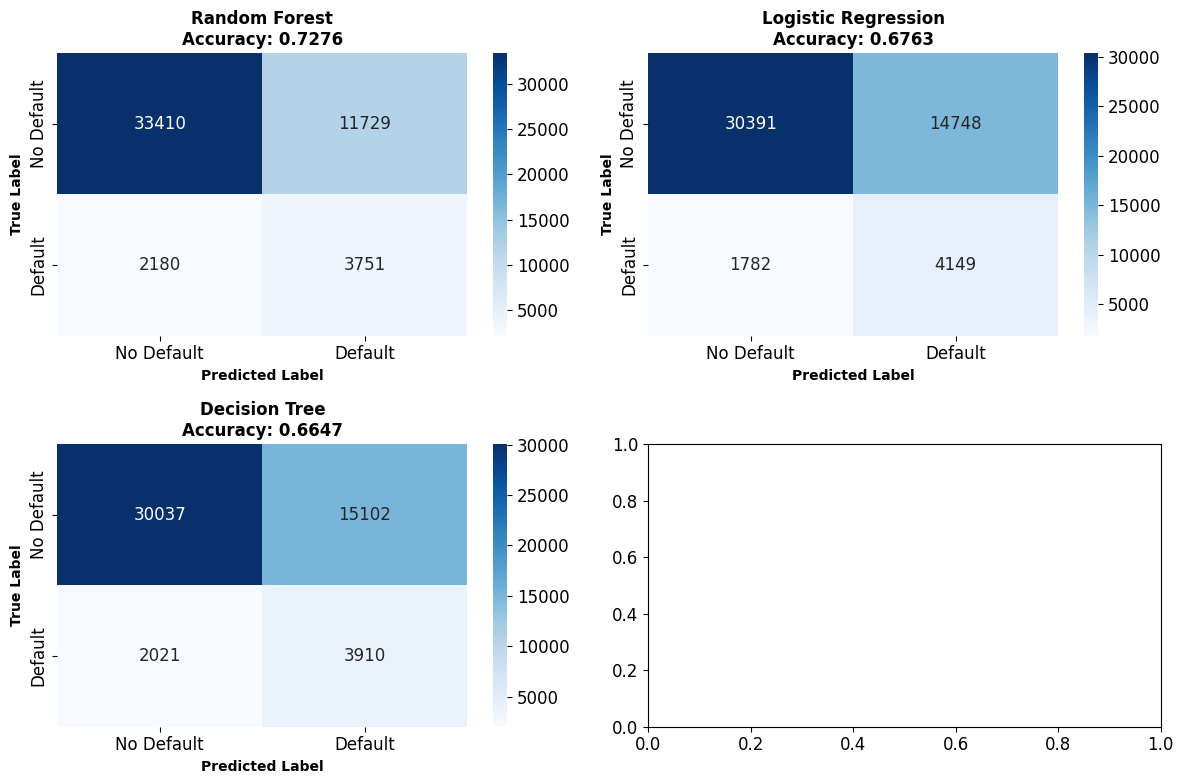


DETAILED CLASSIFICATION REPORTS

Random Forest - Classification Report
              precision    recall  f1-score   support

  No Default       0.94      0.74      0.83     45139
     Default       0.24      0.63      0.35      5931

    accuracy                           0.73     51070
   macro avg       0.59      0.69      0.59     51070
weighted avg       0.86      0.73      0.77     51070


Logistic Regression - Classification Report
              precision    recall  f1-score   support

  No Default       0.94      0.67      0.79     45139
     Default       0.22      0.70      0.33      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.73     51070


Decision Tree - Classification Report
              precision    recall  f1-score   support

  No Default       0.94      0.67      0.78     45139
     Default       0.21      0.66      0.31      5931

    accuracy              

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result["predictions"])

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=axes[idx],
        cbar=True,
        xticklabels=["No Default", "Default"],
        yticklabels=["No Default", "Default"],
    )

    axes[idx].set_title(
        f'{name}\nAccuracy: {result["accuracy"]:.4f}', fontsize=12, fontweight="bold"
    )
    axes[idx].set_ylabel("True Label", fontsize=10, fontweight="bold")
    axes[idx].set_xlabel("Predicted Label", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed Classification Reports
print("\n" + "=" * 50)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 50)

for name, result in results.items():
    print(f"\n{'='*50}")
    print(f"{name} - Classification Report")
    print(f"{'='*50}")
    print(
        classification_report(
            y_test, result["predictions"], target_names=["No Default", "Default"]
        )
    )

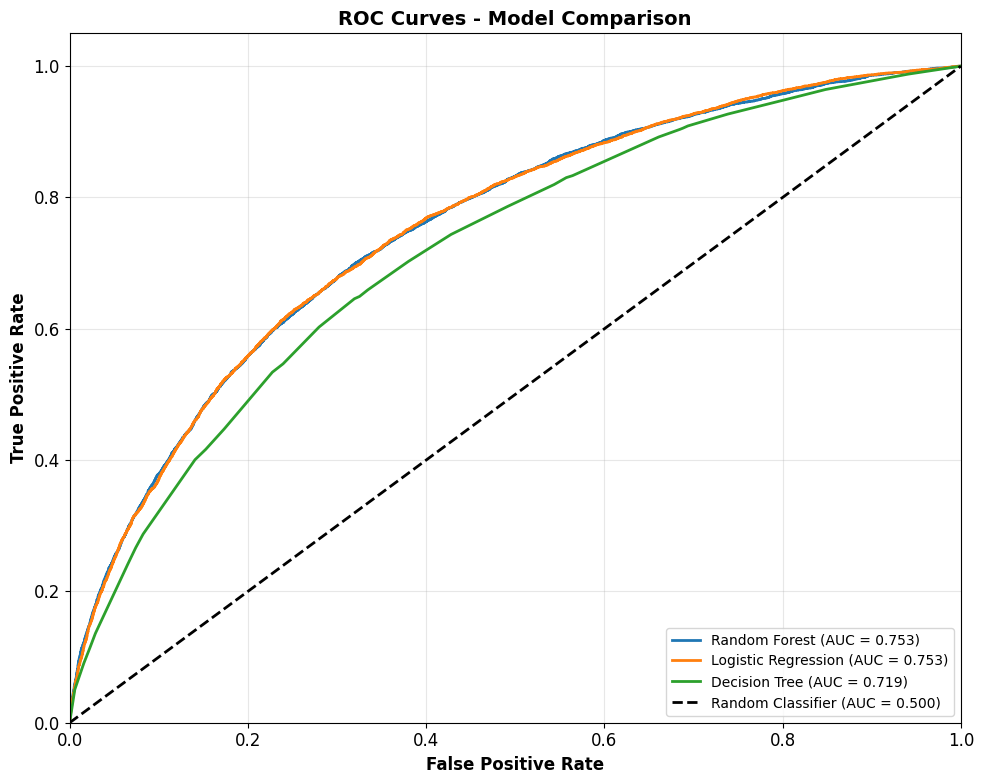

In [ ]:
plt.figure(figsize=(10, 8))

for name, result in results.items():
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, result["probabilities"])
    roc_auc = result["roc_auc"]

    # Plot ROC curve
    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {roc_auc:.3f})")

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], "k--", linewidth=2, label="Random Classifier (AUC = 0.500)")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=12, fontweight="bold")
plt.title("ROC Curves - Model Comparison", fontsize=14, fontweight="bold")
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

In [90]:
print("\n" + "=" * 50)
print("SECTION 9: FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)


SECTION 9: FEATURE IMPORTANCE ANALYSIS



TOP 10 MOST IMPORTANT FEATURES (Random Forest):
       Feature  Importance
           Age    0.276470
  InterestRate    0.184901
        Income    0.152478
MonthsEmployed    0.107676
    LoanAmount    0.101158
   CreditScore    0.041996
      DTIRatio    0.030259
NumCreditLines    0.012945
   HasCoSigner    0.012300
 HasDependents    0.010652


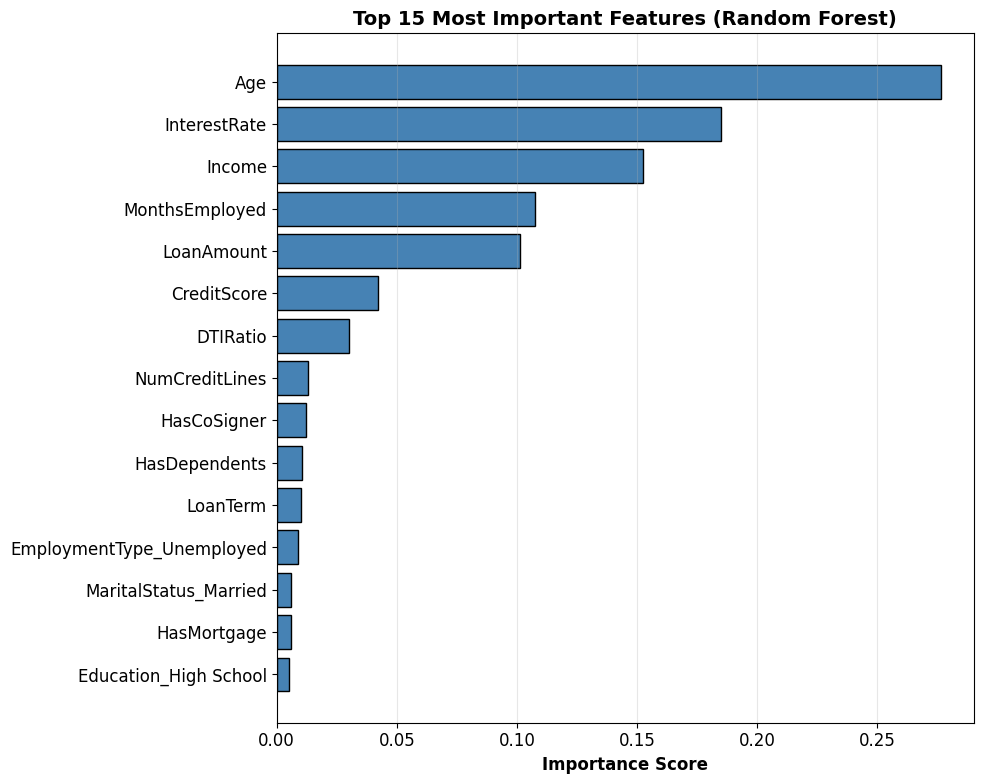

In [ ]:
rf_model = results["Random Forest"]["model"]
feature_importance = pd.DataFrame(
    {"Feature": X_encoded.columns, "Importance": rf_model.feature_importances_}
).sort_values("Importance", ascending=False)

print("\nTOP 10 MOST IMPORTANT FEATURES (Random Forest):")
print("=" * 70)
print(feature_importance.head(10).to_string(index=False))

# Visualize top 15 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(
    range(len(top_features)),
    top_features["Importance"],
    color="steelblue",
    edgecolor="black",
)
plt.yticks(range(len(top_features)), top_features["Feature"])
plt.xlabel("Importance Score", fontsize=12, fontweight="bold")
plt.title(
    "Top 15 Most Important Features (Random Forest)", fontsize=14, fontweight="bold"
)
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

In [92]:
print("\n" + "=" * 50)
print("SECTION 10: TESTING WITH NEW LOAN APPLICATIONS")
print("=" * 50)


SECTION 10: TESTING WITH NEW LOAN APPLICATIONS


In [93]:
new_applicants = pd.DataFrame(
    {
        "Age": [35, 45, 28, 22, 50, 38],
        "Income": [75000, 120000, 45000, 28000, 55000, 35000],
        "LoanAmount": [25000, 50000, 30000, 40000, 60000, 45000],
        "CreditScore": [720, 650, 580, 480, 520, 550],
        "MonthsEmployed": [60, 120, 24, 8, 36, 15],
        "NumCreditLines": [5, 8, 3, 2, 10, 6],
        "InterestRate": [5.5, 7.2, 9.8, 12.5, 11.0, 13.5],
        "LoanTerm": [36, 60, 48, 60, 72, 60],
        "DTIRatio": [0.25, 0.38, 0.45, 0.65, 0.58, 0.72],
        "Education": [
            "Bachelor",
            "Master",
            "High School",
            "High School",
            "High School",
            "Associate",
        ],
        "EmploymentType": [
            "Full-Time",
            "Full-Time",
            "Part-Time",
            "Part-Time",
            "Full-Time",
            "Self-Employed",
        ],
        "MaritalStatus": [
            "Married",
            "Single",
            "Single",
            "Single",
            "Divorced",
            "Single",
        ],
        "LoanPurpose": [
            "Home",
            "Business",
            "Auto",
            "Personal",
            "Debt Consolidation",
            "Education",
        ],
        "HasMortgage": ["Yes", "Yes", "No", "No", "Yes", "No"],
        "HasDependents": ["Yes", "No", "Yes", "No", "Yes", "Yes"],
        "HasCoSigner": ["No", "No", "Yes", "No", "No", "No"],
    }
)

print("\nNew Loan Applications:")
print(new_applicants)


New Loan Applications:
   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   35   75000       25000          720              60               5   
1   45  120000       50000          650             120               8   
2   28   45000       30000          580              24               3   
3   22   28000       40000          480               8               2   
4   50   55000       60000          520              36              10   
5   38   35000       45000          550              15               6   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0           5.5        36      0.25     Bachelor      Full-Time       Married   
1           7.2        60      0.38       Master      Full-Time        Single   
2           9.8        48      0.45  High School      Part-Time        Single   
3          12.5        60      0.65  High School      Part-Time        Single   
4          11.0        72      0.58  High Sch

In [94]:
new_applicants_encoded = pd.get_dummies(
    new_applicants, columns=categorical_cols, drop_first=True
)
# Ensure same columns as training data
for col in X_encoded.columns:
    if col not in new_applicants_encoded.columns:
        new_applicants_encoded[col] = 0

new_applicants_encoded = new_applicants_encoded[X_encoded.columns]

# Convert binary columns
for col in binary_cols:
    if new_applicants_encoded[col].dtype == "object":
        new_applicants_encoded[col] = new_applicants_encoded[col].map(
            {"Yes": 1, "No": 0}
        )

# Scale numerical features
new_applicants_encoded[numerical_cols] = scaler.transform(
    new_applicants_encoded[numerical_cols]
)

# Make predictions with best model
best_model = results[best_model_name]["model"]
predictions = best_model.predict(new_applicants_encoded)

print("\n" + "=" * 50)
print(f"PREDICTIONS USING BEST MODEL: {best_model_name}")
print("=" * 50)

for i, pred in enumerate(predictions):
    status = "HIGH RISK (Will Default)" if pred == 1 else "LOW RISK (Will Repay)"
    print(f"Applicant {i+1}:")
    print(
        f"Age: {new_applicants.iloc[i]['Age']}, Income: ${new_applicants.iloc[i]['Income']:,}, Credit Score: {new_applicants.iloc[i]['CreditScore']}"
    )
    print(f"Prediction: {status}")


PREDICTIONS USING BEST MODEL: Random Forest
Applicant 1:
Age: 35, Income: $75,000, Credit Score: 720
Prediction: LOW RISK (Will Repay)
Applicant 2:
Age: 45, Income: $120,000, Credit Score: 650
Prediction: LOW RISK (Will Repay)
Applicant 3:
Age: 28, Income: $45,000, Credit Score: 580
Prediction: LOW RISK (Will Repay)
Applicant 4:
Age: 22, Income: $28,000, Credit Score: 480
Prediction: HIGH RISK (Will Default)
Applicant 5:
Age: 50, Income: $55,000, Credit Score: 520
Prediction: LOW RISK (Will Repay)
Applicant 6:
Age: 38, Income: $35,000, Credit Score: 550
Prediction: HIGH RISK (Will Default)


In [95]:
print("\n" + "=" * 60)
print("SECTION 11: PROJECT SUMMARY & BUSINESS RECOMMENDATIONS")
print("=" * 60)


SECTION 11: PROJECT SUMMARY & BUSINESS RECOMMENDATIONS


In [96]:
print(
    f"""PROJECT SUMMARY:
{'='*80}
Dataset: {len(loan_dataset):,} loan applications analyzed
Features: {X_encoded.shape[1]} features after encoding
Algorithms Compared: 4 classifiers
Best Model: {best_model_name}
Best Accuracy: {best_accuracy*100:.2f}%

KEY FINDINGS:
{'='*80}
1. Default Rate: {(loan_dataset['Default'].sum() / len(loan_dataset)) * 100:.2f}% of loans default
2. Most Important Feature: {feature_importance.iloc[0]['Feature']}
3. Credit Score Impact: Lower credit scores strongly correlate with default
4. DTI Ratio Impact: Higher debt-to-income ratios increase default risk

BUSINESS RECOMMENDATIONS:
{'='*80}
1. Implement {best_model_name} for automated loan approval screening
2. Set credit score threshold at {loan_dataset[loan_dataset['Default']==0]['CreditScore'].quantile(0.25):.0f} for low-risk applicants
3. Require additional verification for DTI ratios above {loan_dataset[loan_dataset['Default']==1]['DTIRatio'].median():.2f}
4. Focus on top {feature_importance.head(5).shape[0]} features for quick risk assessment
5. Regularly retrain model with new data to maintain accuracy
"""
)

PROJECT SUMMARY:
Dataset: 255,347 loan applications analyzed
Features: 24 features after encoding
Algorithms Compared: 4 classifiers
Best Model: Random Forest
Best Accuracy: 72.76%

KEY FINDINGS:
1. Default Rate: 11.61% of loans default
2. Most Important Feature: Age
3. Credit Score Impact: Lower credit scores strongly correlate with default
4. DTI Ratio Impact: Higher debt-to-income ratios increase default risk

BUSINESS RECOMMENDATIONS:
1. Implement Random Forest for automated loan approval screening
2. Set credit score threshold at 439 for low-risk applicants
3. Require additional verification for DTI ratios above 0.52
4. Focus on top 5 features for quick risk assessment
5. Regularly retrain model with new data to maintain accuracy

